In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/loan_final313.csv")
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,887379.0,3.246513e+07,2.282734e+07,54734.00,9206643.000,3.443327e+07,5.490814e+07,6.861706e+07
year,887379.0,2.014022e+03,1.261741e+00,2007.00,2013.000,2.014000e+03,2.015000e+03,2.015000e+03
final_d,887379.0,1.047089e+06,4.555149e+04,1012008.00,1012016.000,1.012016e+06,1.092015e+06,1.122015e+06
emp_length_int,887379.0,6.050564e+00,3.507405e+00,0.50,3.000,6.050000e+00,1.000000e+01,1.000000e+01
home_ownership_cat,887379.0,2.099130e+00,9.448385e-01,1.00,1.000,3.000000e+00,3.000000e+00,6.000000e+00
annual_inc,887379.0,7.502759e+04,6.469815e+04,0.00,45000.000,6.500000e+04,9.000000e+04,9.500000e+06
income_cat,887379.0,1.196702e+00,4.425417e-01,1.00,1.000,1.000000e+00,1.000000e+00,3.000000e+00
loan_amount,887379.0,1.475526e+04,8.435456e+03,500.00,8000.000,1.300000e+04,2.000000e+04,3.500000e+04
term_cat,887379.0,1.300045e+00,4.582776e-01,1.00,1.000,1.000000e+00,2.000000e+00,2.000000e+00
application_type_cat,887379.0,1.000576e+00,2.399004e-02,1.00,1.000,1.000000e+00,1.000000e+00,2.000000e+00


In [8]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

'home_ownership','income_category','term','application_type','purpose','loan_condition','interest_payments','grade'

The data set already has categories for the same (encoded), therefore we have taken these variables out of the data set and only considered the encoded columns.

Further, the dependent variable is loan condition cat 1 is bad loan and 0 is good loan

have removed region from the data set.

In [9]:
loan_df = df.drop(['id','year','issue_d','final_d','home_ownership','income_category','term','application_type','purpose','loan_condition','interest_payments','grade','region'], axis=1)
loan_df.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87
1,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83
2,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33
3,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31
4,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79


In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   emp_length_int        887379 non-null  float64
 1   home_ownership_cat    887379 non-null  int64  
 2   annual_inc            887379 non-null  int64  
 3   income_cat            887379 non-null  int64  
 4   loan_amount           887379 non-null  int64  
 5   term_cat              887379 non-null  int64  
 6   application_type_cat  887379 non-null  int64  
 7   purpose_cat           887379 non-null  int64  
 8   interest_payment_cat  887379 non-null  int64  
 9   loan_condition_cat    887379 non-null  int64  
 10  interest_rate         887379 non-null  float64
 11  grade_cat             887379 non-null  int64  
 12  dti                   887379 non-null  float64
 13  total_pymnt           887379 non-null  float64
 14  total_rec_prncp       887379 non-null  float64
 15  

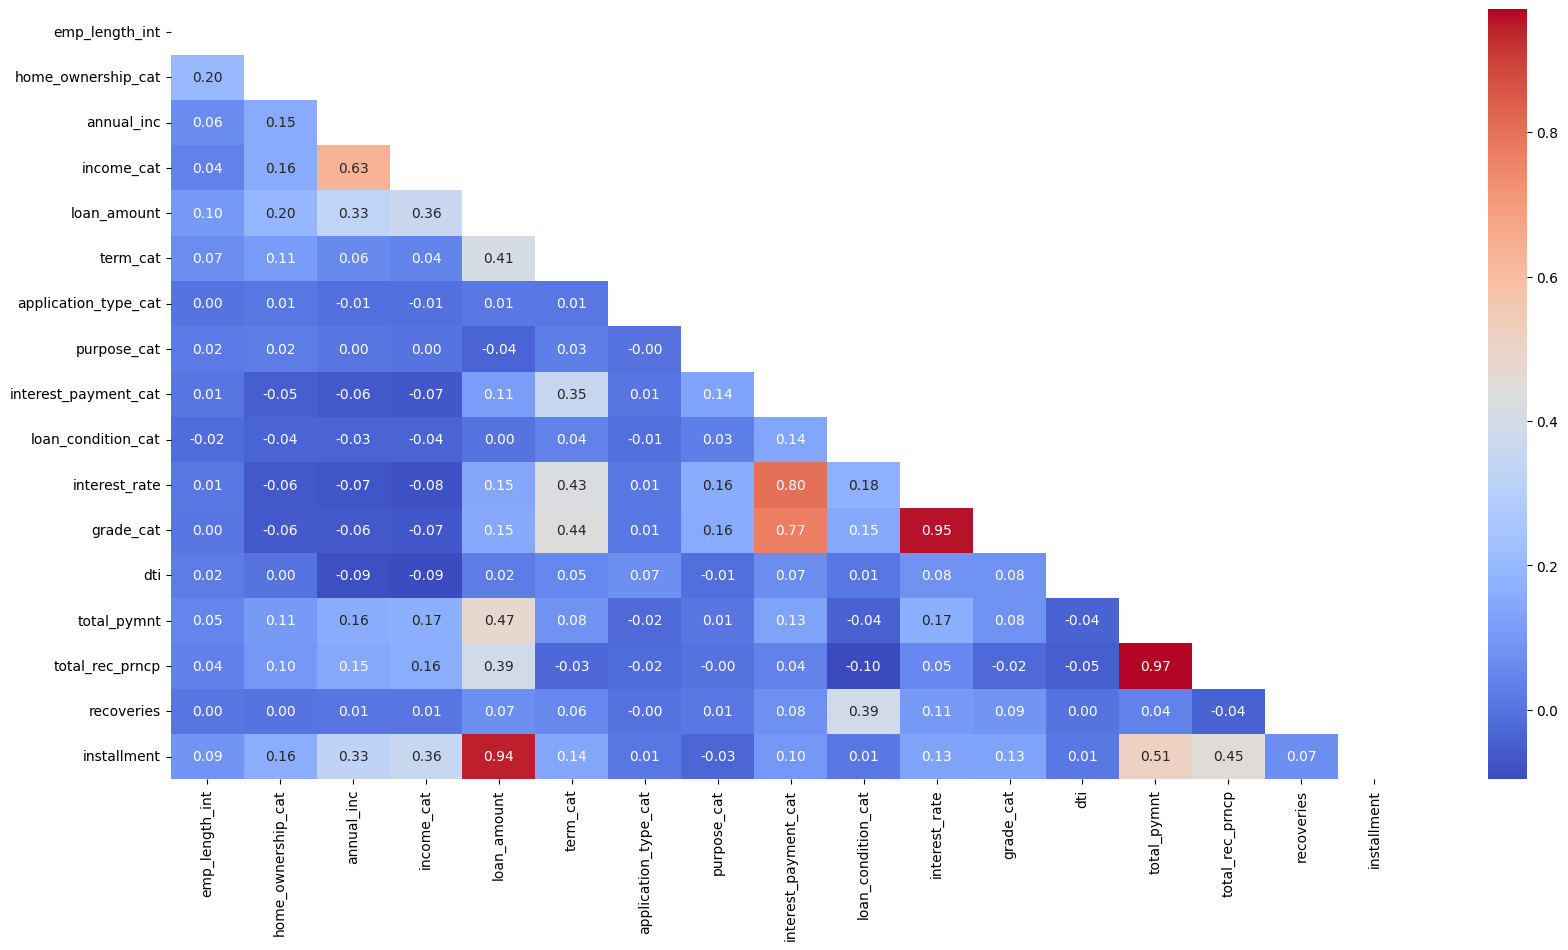

In [11]:
corr_matrix = loan_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

# EDA on the Data set

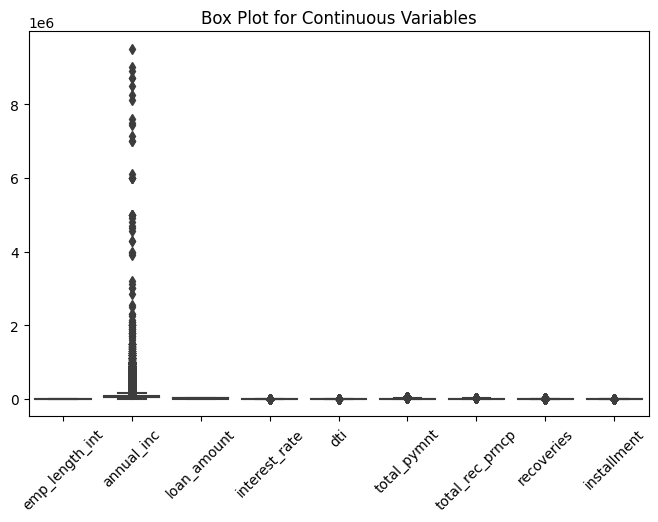

In [12]:
# Boxplot for continuous variables

da = pd.DataFrame(loan_df)
cont_var = ['emp_length_int','annual_inc','loan_amount','interest_rate','dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

plt.figure(figsize = (8,5))
sns.boxplot(data = da[cont_var])
plt.title('Box Plot for Continuous Variables')
plt.xticks(rotation = 45)
plt.show()

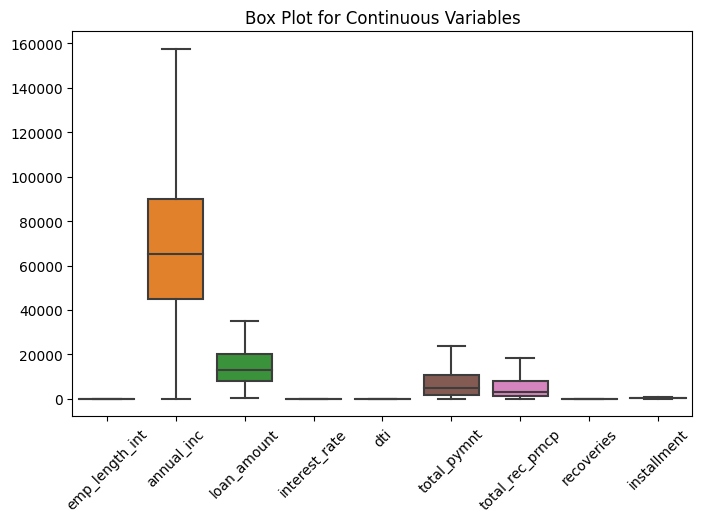

In [13]:
def remo_out(col):
    sorted (col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    return lr, ur

for column in cont_var:
    lr,ur = remo_out(da[column])
    da[column] = np.where(da[column]>ur, ur, da[column])
    da[column] = np.where(da[column]<lr,lr,da[column])

plt.figure(figsize = (8,5))
sns.boxplot(data = da[cont_var])
plt.title('Box Plot for Continuous Variables')
plt.xticks(rotation = 45)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['emp_length_int','annual_inc','loan_amount','interest_rate','dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']
loan_df[columns_to_standardize] = scaler.fit_transform(loan_df[columns_to_standardize])

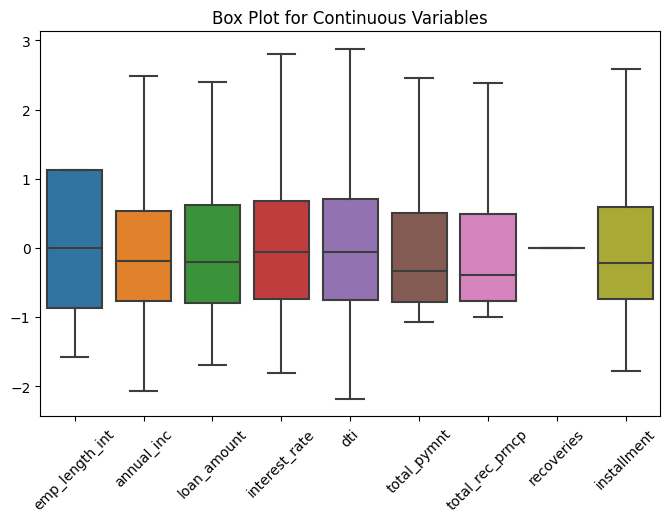

In [15]:
plt.figure(figsize = (8,5))
sns.boxplot(data = loan_df[cont_var])
plt.title('Box Plot for Continuous Variables')
plt.xticks(rotation = 45)
plt.show()

0    0.924013
1    0.075987
Name: loan_condition_cat, dtype: float64
0    819950
1     67429
Name: loan_condition_cat, dtype: int64


<Axes: xlabel='loan_condition_cat', ylabel='count'>

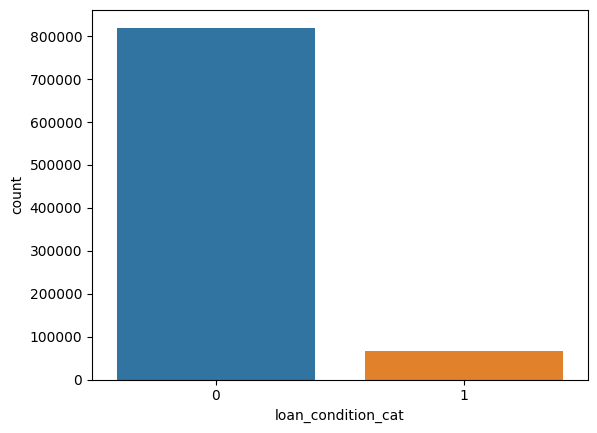

In [16]:
print(loan_df["loan_condition_cat"].value_counts(normalize=True))
print(loan_df["loan_condition_cat"].value_counts())
sns.countplot(x="loan_condition_cat", data=loan_df)
# bad loan is 1

In [17]:
cat_col = ['home_ownership_cat','income_cat', 'term_cat','application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat','grade_cat']
for i in cat_col:
    print ('Unique Values in', i,'are:')
    print (loan_df[i].value_counts())
    print ('*'*50)

Unique Values in home_ownership_cat are:
3    443557
1    356117
2     87470
4       182
5        50
6         3
Name: home_ownership_cat, dtype: int64
**************************************************
Unique Values in income_cat are:
1    729616
2    140977
3     16786
Name: income_cat, dtype: int64
**************************************************
Unique Values in term_cat are:
1    621125
2    266254
Name: term_cat, dtype: int64
**************************************************
Unique Values in application_type_cat are:
1    886868
2       511
Name: application_type_cat, dtype: int64
**************************************************
Unique Values in purpose_cat are:
6     524215
1     206182
7      51829
4      42894
8      17277
3      10377
2       8863
9       8540
10      5414
11      4736
12      3707
5       2347
13       575
14       423
Name: purpose_cat, dtype: int64
**************************************************
Unique Values in interest_payment_cat are:
1    46531

In [18]:
bad_loan = df[loan_df['loan_condition_cat']==1]
good_loan = df[loan_df['loan_condition_cat'] == 0]

In [19]:
loan_df.columns

Index(['emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat',
       'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat',
       'interest_payment_cat', 'loan_condition_cat', 'interest_rate',
       'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment'],
      dtype='object')

10.00    19856
2.00      6034
0.50      5815
3.00      5396
5.00      4540
1.00      4494
4.00      4089
6.00      3840
7.00      3730
6.05      3710
8.00      3258
9.00      2667
Name: emp_length_int, dtype: int64
10.00    271713
2.00      72836
0.50      64790
3.00      64630
1.00      52601
5.00      51164
4.00      48440
6.05      41115
7.00      40864
8.00      40697
6.00      39110
9.00      31990
Name: emp_length_int, dtype: int64


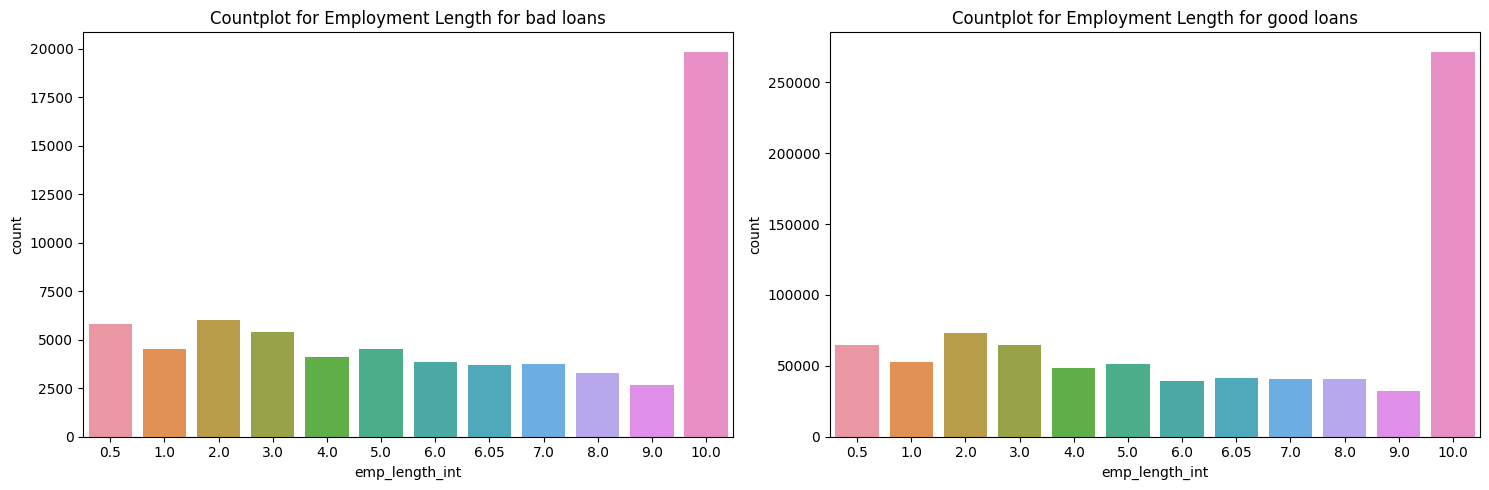

In [20]:
print(bad_loan['emp_length_int'].value_counts())
print(good_loan['emp_length_int'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x ="emp_length_int", data=bad_loan,  ax=axes[0])
axes[0].set_title("Countplot for Employment Length for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x ="emp_length_int", data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Employment Length for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

1    31391
3    29699
2     6293
4       38
5        8
Name: home_ownership_cat, dtype: int64
3    413858
1    324726
2     81177
4       144
5        42
6         3
Name: home_ownership_cat, dtype: int64


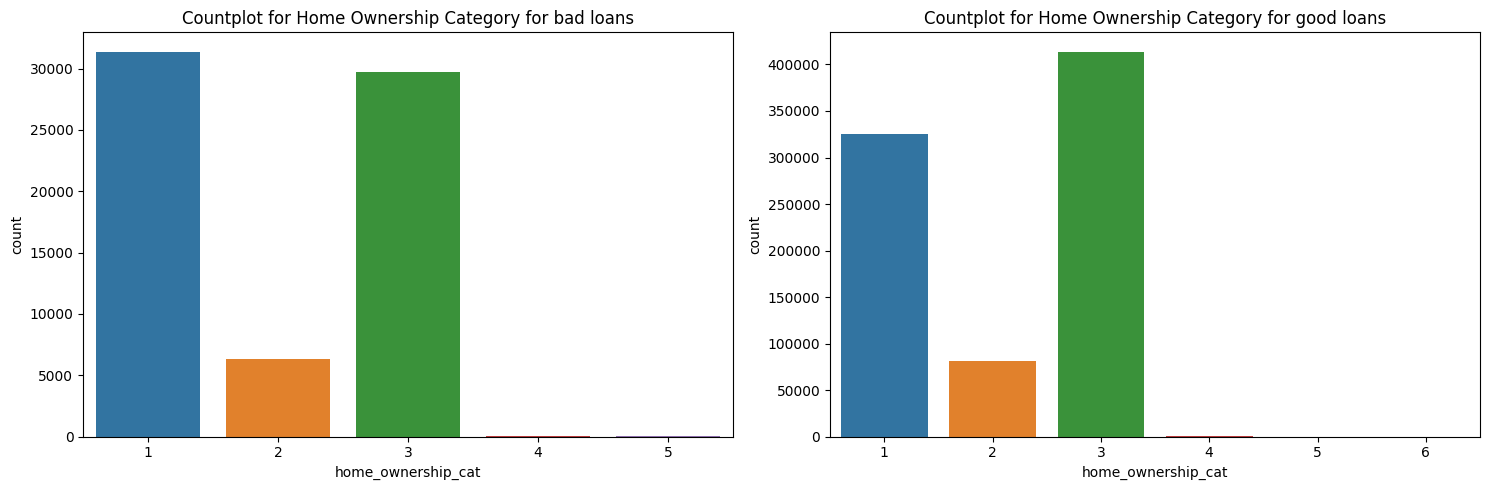

In [21]:
print(bad_loan['home_ownership_cat'].value_counts())
print(good_loan['home_ownership_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x = "home_ownership_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Home Ownership Category for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x = "home_ownership_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Home Ownership Category for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

1    58865
2     7756
3      808
Name: income_cat, dtype: int64
1    670751
2    133221
3     15978
Name: income_cat, dtype: int64


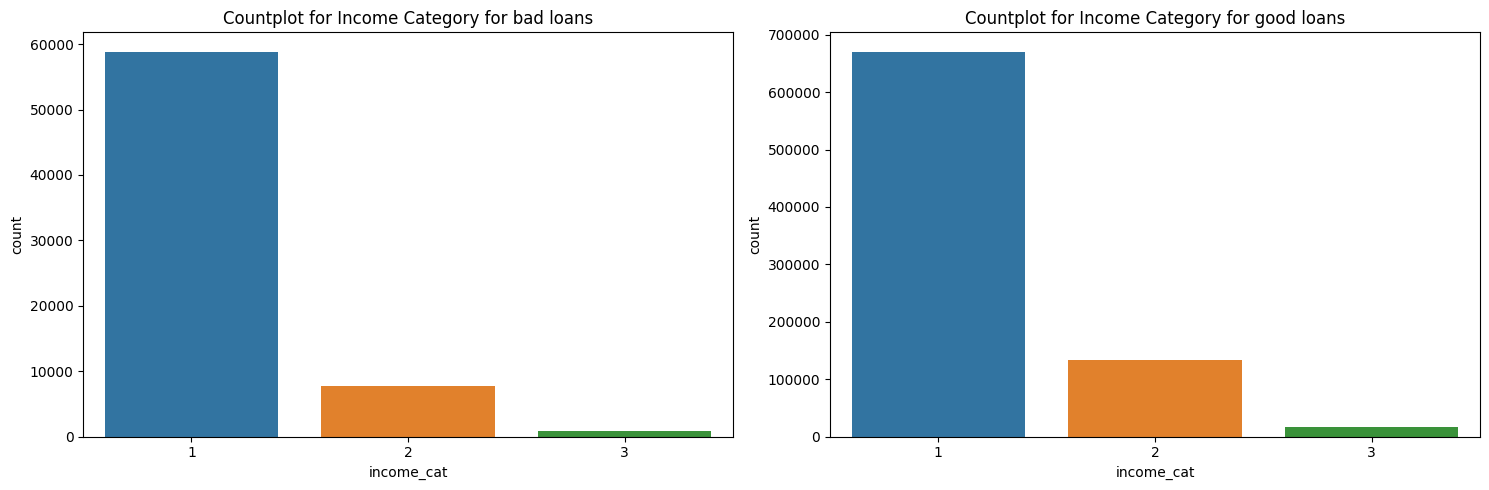

In [22]:
print(bad_loan['income_cat'].value_counts())
print(good_loan['income_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="income_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Income Category for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="income_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Income Category for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

1    42931
2    24498
Name: term_cat, dtype: int64
1    578194
2    241756
Name: term_cat, dtype: int64


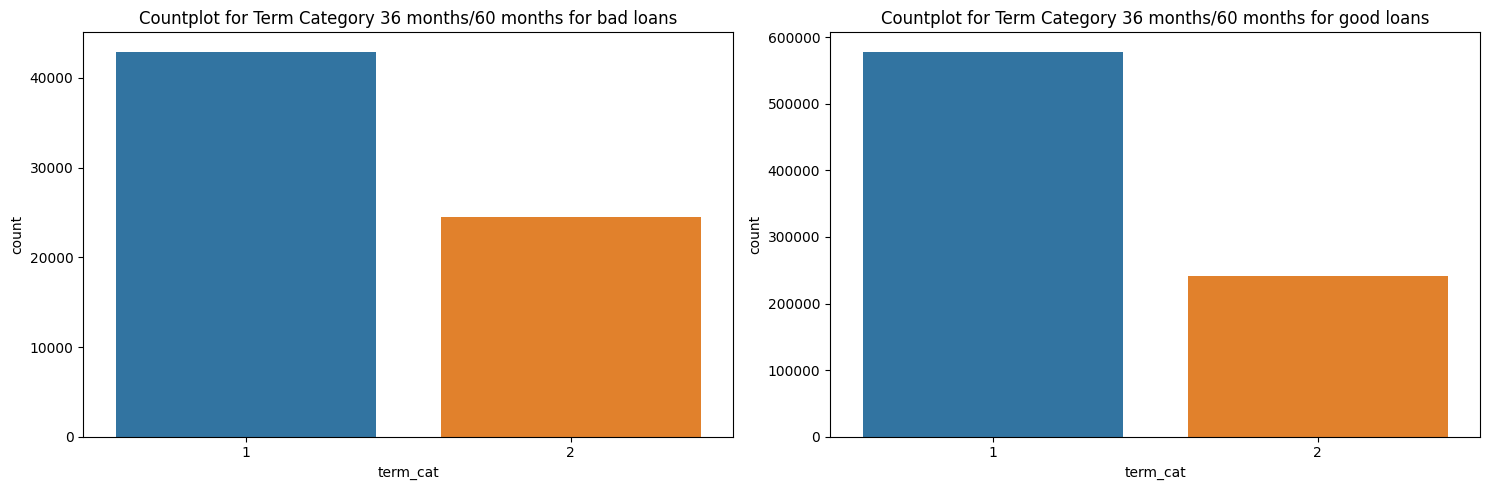

In [23]:
print(bad_loan['term_cat'].value_counts())
print(good_loan['term_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="term_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Term Category 36 months/60 months for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="term_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Term Category 36 months/60 months for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

1    67424
2        5
Name: application_type_cat, dtype: int64
1    819444
2       506
Name: application_type_cat, dtype: int64


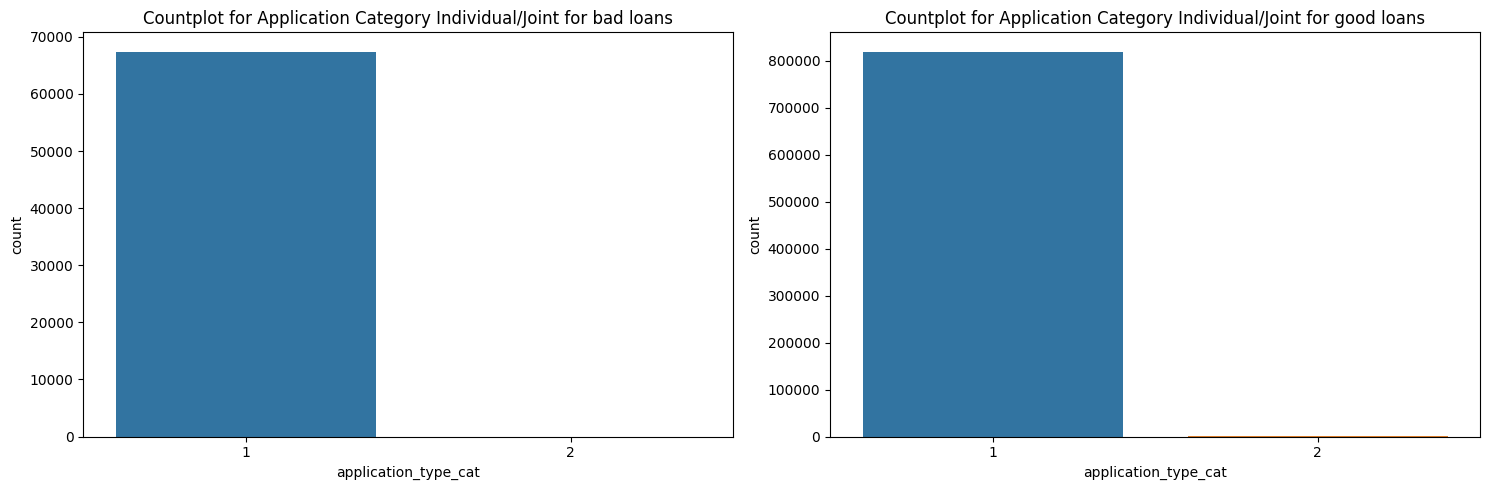

In [24]:
print(bad_loan['application_type_cat'].value_counts())
print(good_loan['application_type_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="application_type_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Application Category Individual/Joint for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="application_type_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Application Category Individual/Joint for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

6     41608
1     11755
4      4163
7      3553
3      1781
8      1294
9       804
10      607
2       596
12      417
11      402
5       289
14       88
13       72
Name: purpose_cat, dtype: int64
6     482607
1     194427
7      48276
4      38731
8      15983
3       8596
2       8267
9       7736
10      4807
11      4334
12      3290
5       2058
13       503
14       335
Name: purpose_cat, dtype: int64


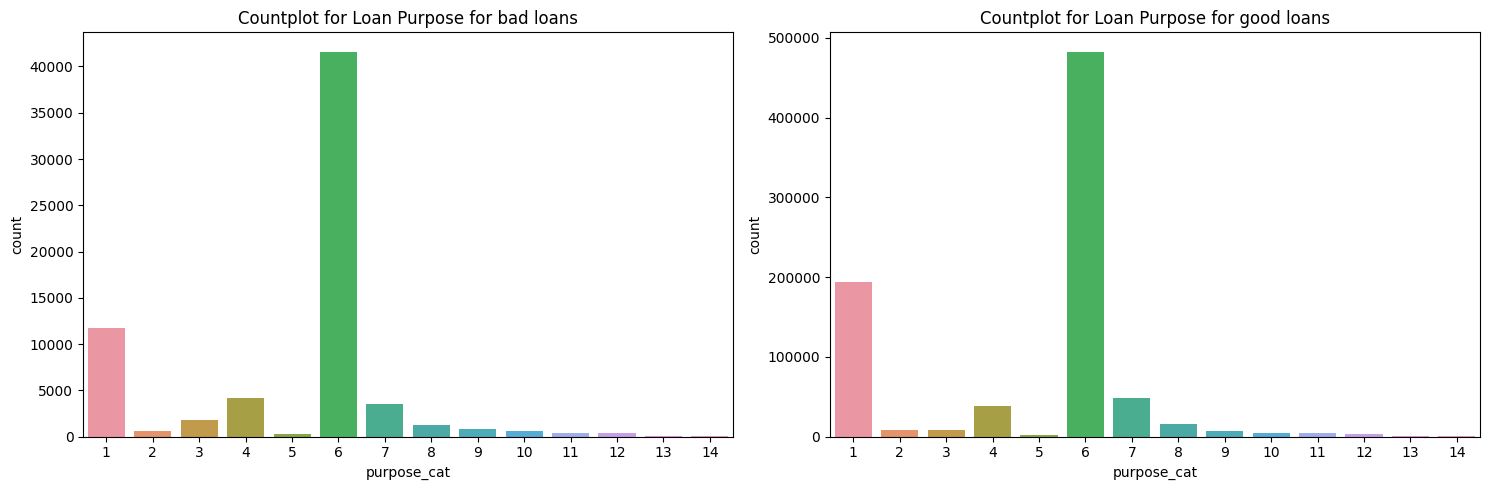

In [25]:
print(bad_loan['purpose_cat'].value_counts())
print(good_loan['purpose_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="purpose_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Loan Purpose for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="purpose_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Loan Purpose for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

2    48572
1    18857
Name: interest_payment_cat, dtype: int64
1    446459
2    373491
Name: interest_payment_cat, dtype: int64


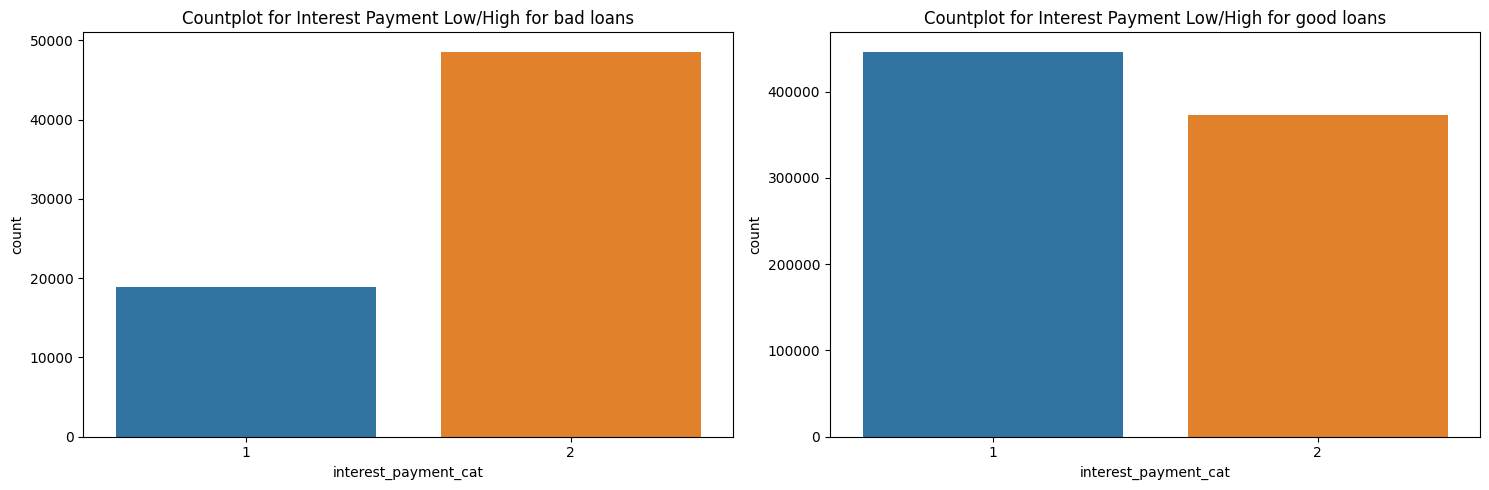

In [26]:
print(bad_loan['interest_payment_cat'].value_counts())
print(good_loan['interest_payment_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="interest_payment_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Interest Payment Low/High for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="interest_payment_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Interest Payment Low/High for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

3    19054
4    15859
2    13456
5     9745
6     4383
1     3663
7     1269
Name: grade_cat, dtype: int64
2    241079
3    226806
1    144539
4    123683
5     60960
6     18663
7      4220
Name: grade_cat, dtype: int64


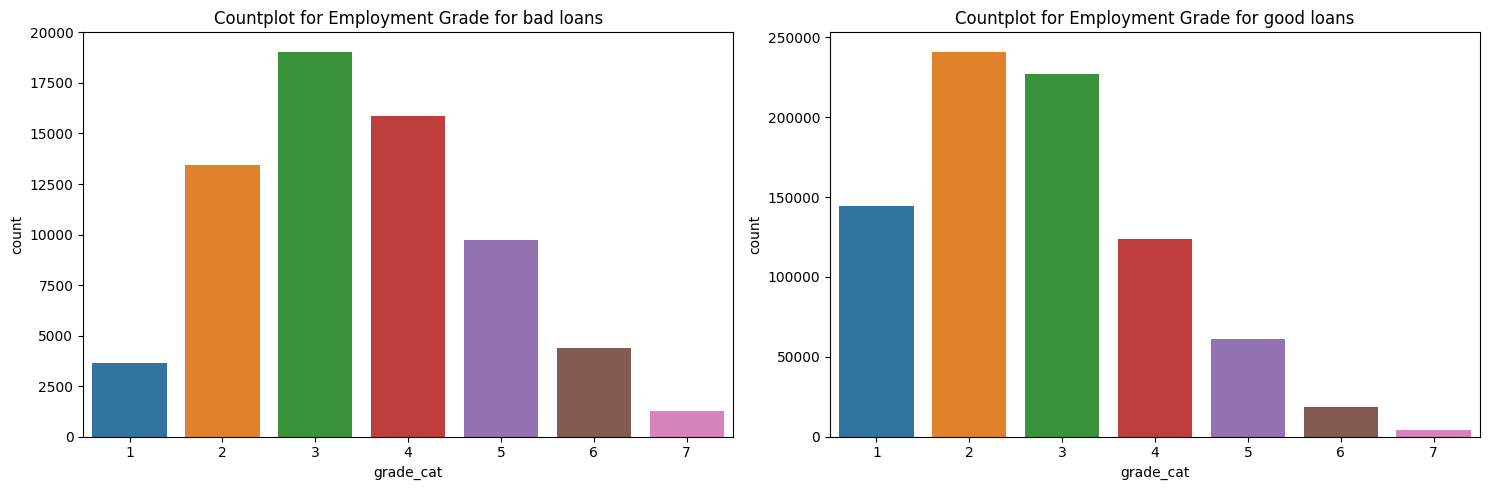

In [27]:
print(bad_loan['grade_cat'].value_counts())
print(good_loan['grade_cat'].value_counts())

fig, axes = plt.subplots(1, 2,  figsize=(15, 5))

# Plot the second countplot in the second subplot
sns.countplot(x="grade_cat",data=bad_loan, ax=axes[0])
axes[0].set_title("Countplot for Employment Grade for bad loans")

# Plot the third countplot in the second subplot
sns.countplot(x="grade_cat",data=good_loan, ax=axes[1])
axes[1].set_title("Countplot for Employment Grade for good loans")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

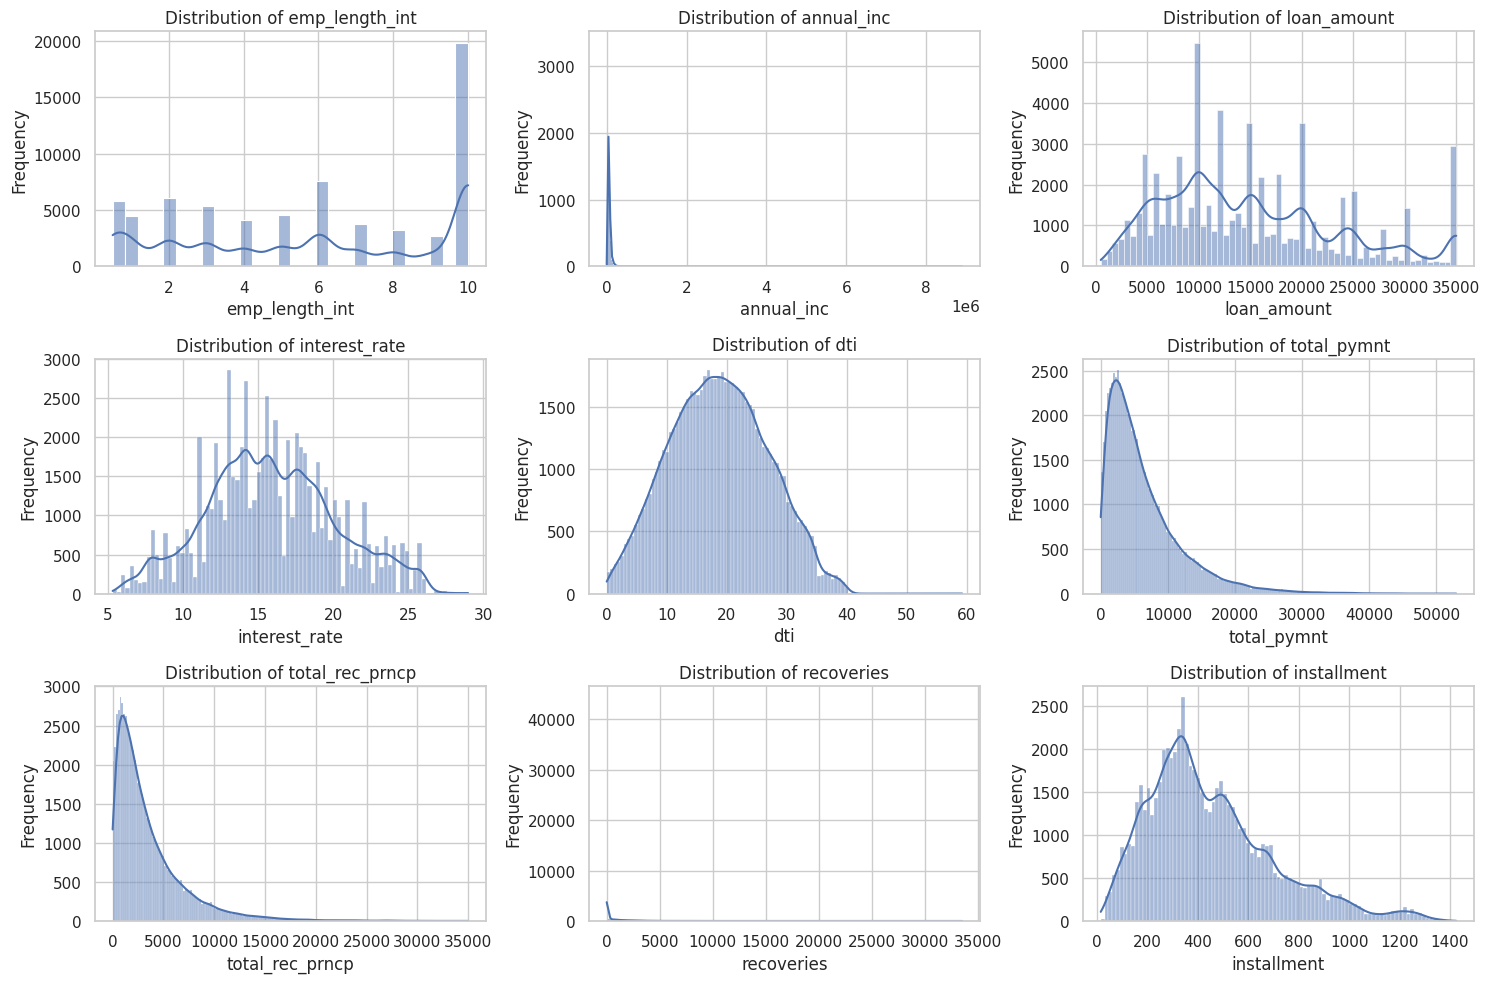

In [28]:
# List of columns to create distplots for
columns_to_plot = ['emp_length_int', 'annual_inc', 'loan_amount', 'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each column side by side
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(bad_loan[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
X = loan_df.drop(columns="loan_condition_cat")
y = loan_df["loan_condition_cat"]

In [30]:
X.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1.126029,1,-1.371394,1,-1.156460,1,1,1,1,-0.593397,2,1.146565,-0.196754,-0.063497,0.0,-1.150962
1,-1.582528,1,-1.198284,1,-1.452829,2,1,2,2,0.464167,3,-2.063369,-0.919402,-0.907781,0.0,-1.589048
2,1.126029,1,-1.710342,1,-1.464683,1,1,3,2,0.622115,3,-1.133512,-0.622301,-0.546631,0.0,-1.484884
3,1.126029,1,-0.644334,1,-0.563724,1,1,4,2,0.056707,3,0.225139,0.751202,0.865606,0.0,-0.400807
4,-1.439973,1,0.244294,1,-1.393555,2,1,4,1,-0.126421,2,-0.022983,-0.586779,-0.577644,0.0,-1.555205


In [31]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: loan_condition_cat, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
X_train.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
393427,-0.000161,1,-1.292629,1,-0.563724,1,1,6,1,-0.359909,2,-0.109706,-0.085009,-0.040502,0.0,-0.437966
623942,-0.299528,3,-0.505847,1,-0.326629,1,1,6,2,0.020082,3,0.431105,-0.828950,-0.786323,0.0,-0.116246
239303,-1.582528,2,-0.771281,1,-0.978639,1,1,6,1,-0.286657,2,-1.505695,-0.652336,-0.605339,0.0,-0.925626
399901,-1.582528,1,-1.284839,1,-0.611143,1,1,6,2,0.541996,3,1.189926,0.614265,0.791278,0.0,-0.416282
779026,1.126029,3,0.359701,1,-0.468886,1,1,6,1,-1.225188,1,-0.080798,-0.667763,-0.586616,0.0,-0.406844


In [33]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lg.score(X_train, y_train)

0.9251261742049214

In [35]:
lg.score(X_test, y_test)

0.9248273945021674

In [36]:
lg.coef_

array([[-0.0567221 , -0.05732086, -0.16061807,  0.02212011, -1.29507173,
        -0.40050432, -0.3274379 ,  0.01106225,  0.46945153,  1.36866296,
        -1.00886032, -0.07911675,  3.19333771, -4.18170963,  0.        ,
         1.25557442]])

In [37]:
lg.intercept_

array([-0.11445967])

In [38]:
y_train_predict=lg.predict(X_train)

In [39]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_train_predict_proba=lg.predict_proba(X_train)

In [41]:
y_train_predict_proba

array([[0.92809018, 0.07190982],
       [0.88119795, 0.11880205],
       [0.87246644, 0.12753356],
       ...,
       [0.89160993, 0.10839007],
       [0.945672  , 0.054328  ],
       [0.97917085, 0.02082915]])

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(y_train, y_train_predict)

array([[571254,   2777],
       [ 43732,   3402]])

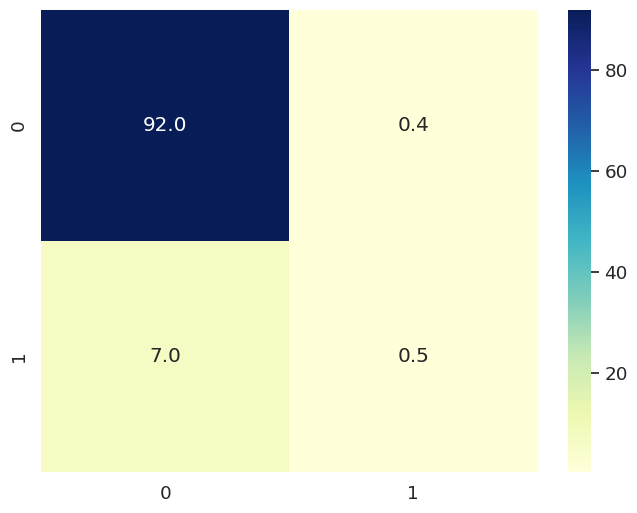

In [44]:
cm = confusion_matrix(y_train, y_train_predict)

# Convert confusion matrix values to percentages
cm_percentage = (cm / np.sum(cm)) * 100

# Set up the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='YlGnBu')
plt.show()

In [45]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    574031
           1       0.55      0.07      0.13     47134

    accuracy                           0.93    621165
   macro avg       0.74      0.53      0.54    621165
weighted avg       0.90      0.93      0.90    621165



There is a need to increase the recall (not enough TP - Bad loans are being identified)

In [46]:
y_test_predict=lg.predict(X_test)

In [47]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
y_test_predict_proba=lg.predict_proba(X_test)

In [49]:
y_test_predict_proba

array([[0.86615842, 0.13384158],
       [0.97939179, 0.02060821],
       [0.96710778, 0.03289222],
       ...,
       [0.99637735, 0.00362265],
       [0.95053122, 0.04946878],
       [0.97010118, 0.02989882]])

In [50]:
confusion_matrix(y_test, y_test_predict)

array([[244760,   1159],
       [ 18853,   1442]])

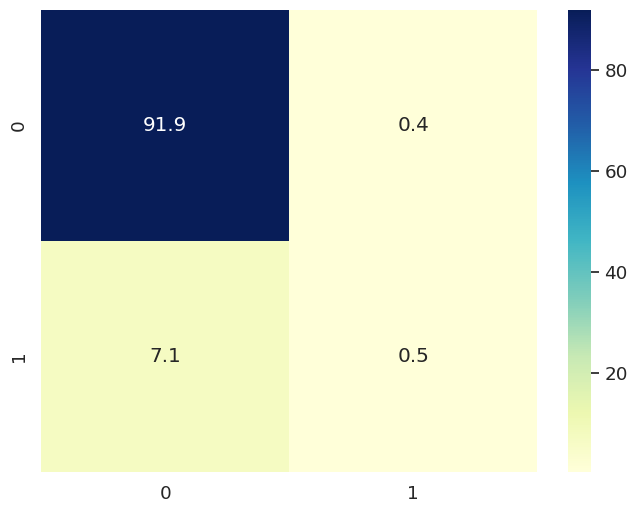

In [51]:
cm = confusion_matrix(y_test, y_test_predict)

# Convert confusion matrix values to percentages
cm_percentage = (cm / np.sum(cm)) * 100

# Set up the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='YlGnBu')
plt.show()

In [52]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    245919
           1       0.55      0.07      0.13     20295

    accuracy                           0.92    266214
   macro avg       0.74      0.53      0.54    266214
weighted avg       0.90      0.92      0.90    266214



In [53]:
prob_train=lg.predict_proba(X_train)
prob_train_value=prob_train[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
auc_train=roc_auc_score(y_train,prob_train_value)

In [54]:
auc_train

0.7901564476025711

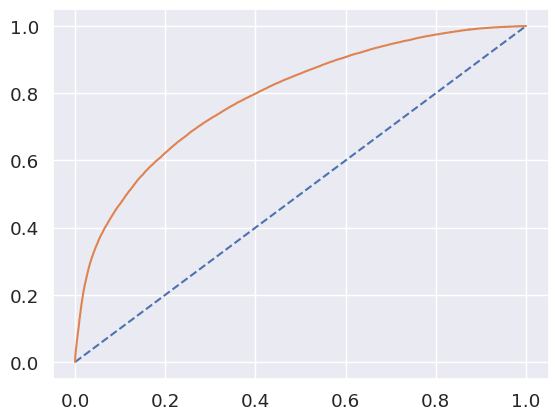

In [55]:
train_tpr,train_fpr,train_threshold=roc_curve(y_train,prob_train_value)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_tpr,train_fpr)

In [56]:
prob_test=lg.predict_proba(X_test)
prob_test_value=prob_test[:,1]
from sklearn.metrics import roc_curve,roc_auc_score
auc_test=roc_auc_score(y_test,prob_test_value)

In [57]:
auc_test

0.7904038719483306

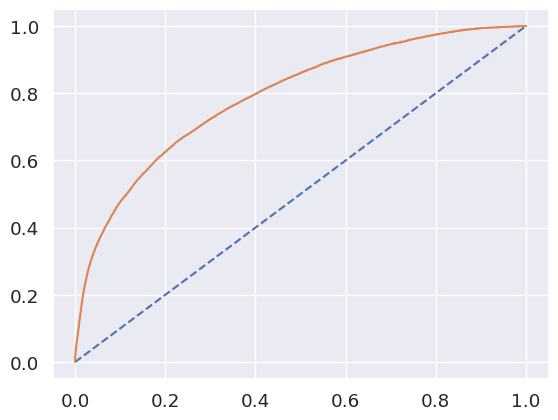

In [58]:
test_tpr,test_fpr,test_threshold=roc_curve(y_test,prob_test_value)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_tpr,test_fpr)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11)  # Adjust the range as needed
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10}
Best Accuracy:  0.9374031054550723
Test Accuracy:  0.9374037428534938


In [61]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6 )

In [62]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=6)

In [63]:
tree_predict = clf_tree.predict(X_test)
roc_auc = roc_auc_score(y_test, tree_predict)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5370144217953714


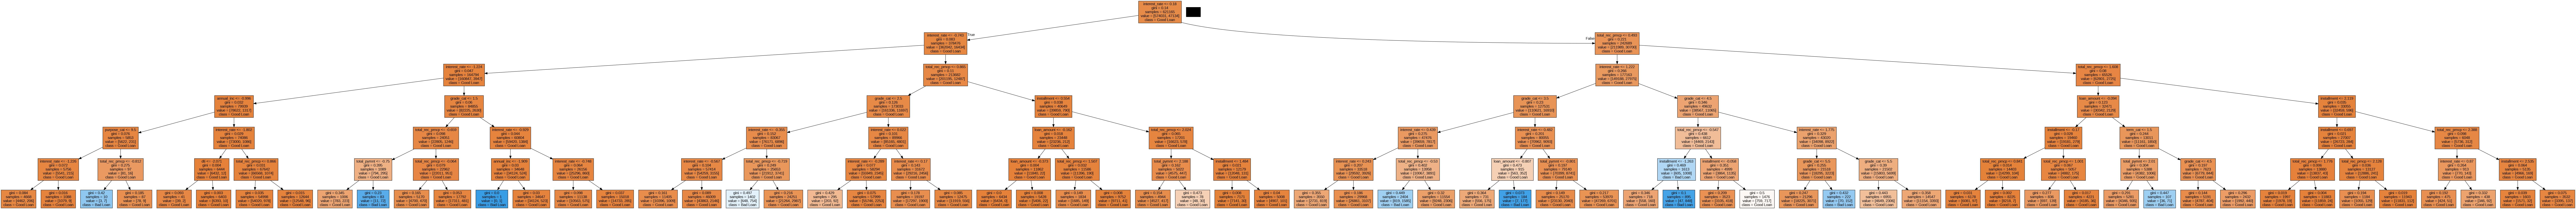

<Figure size 500x500 with 0 Axes>

In [64]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = X_train.columns, class_names= ['Good Loan', 'Bad Loan'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )

plt.figure(figsize=(5, 5))

chd_tree_graph.write_jpg( 'chd_tree.png' )

# Render the png file
Image(filename='chd_tree.png')

In [65]:
from imblearn.under_sampling import RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random undersampling to the training set
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Train a classifier (Random Forest in this example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7768148932813451

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87    163936
           1       0.23      0.80      0.35     13540

    accuracy                           0.78    177476
   macro avg       0.60      0.79      0.61    177476
weighted avg       0.92      0.78      0.83    177476



In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with predefined hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                       criterion='gini',  # Split criterion: 'gini' or 'entropy'
                                       max_depth=None,     # Maximum depth of the tree
                                       min_samples_split=2, # Minimum number of samples required to split an internal node
                                       min_samples_leaf=1   # Minimum number of samples required to be at a leaf node
                                       )

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.9517

Confusion Matrix:
 [[163845     91]
 [  8488   5052]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    163936
           1       0.98      0.37      0.54     13540

    accuracy                           0.95    177476
   macro avg       0.97      0.69      0.76    177476
weighted avg       0.95      0.95      0.94    177476



In [66]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier using decision trees
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=150, random_state=42)

# Train the model on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.9633

Confusion Matrix:
 [[163636    300]
 [  6220   7320]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    163936
           1       0.96      0.54      0.69     13540

    accuracy                           0.96    177476
   macro avg       0.96      0.77      0.84    177476
weighted avg       0.96      0.96      0.96    177476



In [68]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a classifier (Random Forest in this example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.947322454867137

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    163936
           1       0.69      0.56      0.62     13540

    accuracy                           0.95    177476
   macro avg       0.83      0.77      0.80    177476
weighted avg       0.94      0.95      0.94    177476

